In [189]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt

In [190]:
n_clusters = 3
max_iterations = 50
n_samples = 160

In [191]:
true_centroid = [[ rn.uniform(-10,10)  for i in range(0, n_clusters)], [rn.uniform(-10,10)  for i in range(0, n_clusters)]]

In [192]:
true_centroid

[[5.547843879335613, -3.435294191221338, -5.231812643286069],
 [-9.638622653286264, -1.015874513968127, 7.264619386515729]]

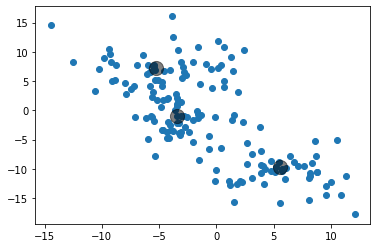

In [193]:

ndata = int(n_samples/n_clusters)
datax = []
datay = []
for j in range(n_clusters):  
    for i in range(0, ndata):  
        datax.append(true_centroid[0][j]+rn.random()*rn.uniform(-10,10) )
        datay.append(true_centroid[1][j]+rn.random()*rn.uniform(-10,10) )
data = [datax, datay]
plt.scatter(data[0][:], data[1][:])
plt.scatter(true_centroid[0][:], true_centroid[1][:], c='black', s=200, alpha=0.5)

In [203]:
mux = []
muy = []
for i in range(n_clusters):
    mux.append(rn.random()*rn.uniform(-10,10) )
    muy.append(rn.random()*rn.uniform(-10,10) )
mu = [mux, muy]
mu


[[1.14505812170436, -0.9453566087217793, -0.10078900668084452],
 [6.25769216998484, -2.501929800089469, 4.7260262506846615]]

In [210]:
k = np.ones(n_clusters)
r = np.zeros((n_samples,n_clusters))
for j in range(max_iterations):
    # definimos los vectores entre cada punto
    for i in range(len(data[0])):
        for cluster in range(n_clusters):
            vec = np.sqrt(data[0][i]**2 + data[1][i]**2)
            muVec = np.sqrt(mu[0][cluster]**2 + mu[1][cluster]**2)
            k = np.sqrt(true_centroid[0][cluster]**2+true_centroid[1][cluster]**2)
            if k >= np.min(np.abs(vec-muVec)):
                r[i][cluster] = 1
    for cluster in range(n_clusters):
        suma11, suma12, suma21, suma22 = 0, 0, 0, 0
        for i in range(len(data[0])):
            suma11 += (r[i][cluster]*data[0][i])
            suma12 += (r[i][cluster])
            suma21 += (r[i][cluster]*data[1][i])
            suma22 += (r[i][cluster])
        mu[0][cluster] = suma11/suma12
        mu[1][cluster] = suma21/suma22

In [201]:
mu

[[-3.19906536630232, -0.7898162944054988, -0.47612233828735884],
 [0.7469419232189899, -0.7934366070104272, -0.9259272579413395]]

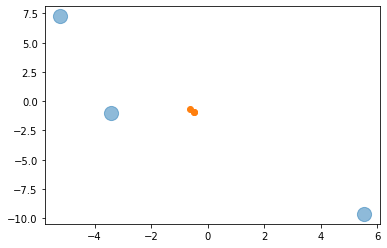

In [209]:
plt.scatter(true_centroid[0][:], true_centroid[1][:], s=200, alpha=0.5)
plt.scatter(mu[0][:],mu[1][:])